  Método de Colocación para resolver la EDO:
  \begin{align*}
    -u''(x) =& f(x) \\
    u(a) &= 0\\
    u(b) &= 0
  \end{align*}

  El método de colocación considera $\omega(x) = \delta(\xi_j)$ y resolvemos la aproximación $u_h = \sum \alpha_i \phi_i$, donde

  $$\sum \alpha_i \phi''_i(\xi_j) = - f(\xi_j), $$

  y además se considera $\phi_i= x^i (1-x)$. Haciendo $a_{i,j} = \phi''_i(\xi_j)$, se tiene que el sistema a resolver es $A^T \alpha = f(\xi)$.

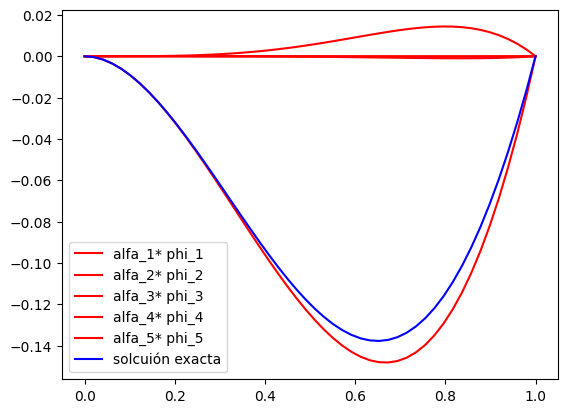

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

phi = lambda x,i: x**i * (1-x)
def ddphi(x,i):
  if i==1:
    return -2
  else:
    if x == 0 and i==2:
      return 2
    else:
      return -i * x**(i-2) * ((i+1)*x - i +1)

def colocation(f,a,b,n):
  h = (b-a)/(n)
  s = np.array([a+ i*h for i in range(n)])
  A = np.zeros((n,n),float)
  for i in range(n):
    for j in range(n):
      A[i][j] = ddphi(s[j],i+1)
  b = -f(s)
  alfa = np.linalg.solve(np.transpose(A),b)
  def u(x):
    z = 0
    for i in range(n):
      z += alfa[i] * phi(x,i+1)
    return z
  return u, alfa

f = lambda x: -((-x**2+x+2)*np.sin(x)+(4*x-2)*np.cos(x))
h = lambda x: x*(x-1)*np.sin(x)
# f = lambda x: np.sin(np.pi * x)
# h = lambda x: np.sin(np.pi * x)/np.pi**2
a = 0
b = 1
n = 5
z, alfa = colocation(f,a,b,n)
X = np.linspace(0,1,50)

for i in range(n):
  plt.plot(X,alfa[i]*phi(X,i+1),c = 'red', label = 'alfa_'+str(i+1) + '* phi_'+str(i+1))
plt.plot(X,h(X),c = 'blue', label ='solcuión exacta')
# plt.plot(X,z(X),c = 'green', label ='solución aprox')
plt.legend()

Método de Garleking: resolvemos el mismo problema que el anterior pero esta vez consideramos $\omega(x) = \phi_j(x)$ con lo que tendríamos:

$$\sum \alpha_i \int_a^b \phi_i''(x) \phi_j(x) = - \int_a^b f(x)\phi_j(x) dx. $$

Haciendo
$$A_{i,j} = \int_a^b \phi_i''(x) \phi_j(x)$$
y
$$b = \left( - \int_a^b f(x)\phi_j(x) dx \right)_j,$$

se tiene que el sistema a resolver es $A^T \alpha = b$.

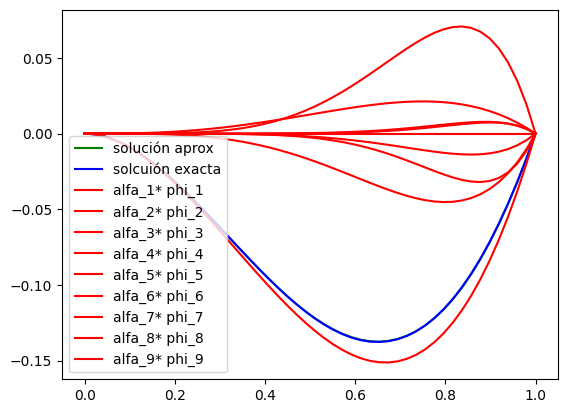

In [ ]:
from scipy.special import roots_legendre
from functools import partial
import numpy as np

def ddphi(x,i): return -i * x**(i-2) * ((i+1)*x - i +1)

def gauss1d(fun, x0, x1, n):
    xi, wi = roots_legendre(n)
    inte = 0
    h = 0.5 * (x1 - x0)
    xm = 0.5 * (x0 + x1)
    for cont in range(n):
        inte = inte + h * fun(h * xi[cont] + xm) * wi[cont]
    return inte

def integration_phi(x,i,j):
  return ddphi(x,i) * phi(x,j)

def garleking(f,a,b,n):
  A = np.zeros((n,n),float)
  B = np.zeros(n,float)
  for k in range(n):
    aux1 = lambda x,j: f(x) * phi(x,j)
    aux2 = partial(aux1, j = k+1)
    B[k] = -gauss1d(aux2,a,b,5)
    for u in range(n):
      aux3 = partial(integration_phi,i=k+1,j=u+1)
      A[k][u] = gauss1d(aux3,a,b,5)
  A = np.transpose(A)
  alfa = np.linalg.solve(A,B)
  def u(x):
    z = 0
    for i in range(n):
      z += alfa[i] * phi(x,i+1)
    return z
  return u, alfa

n = 9
z, alfa = garleking(f,a,b,n)

plt.plot(X,z(X),c = 'green', label ='solución aprox')
plt.plot(X,h(X),c = 'blue', label ='solcuión exacta')

for i in range(n):
  plt.plot(X,alfa[i]*phi(X,i+1),c = 'red', label = 'alfa_'+str(i+1) + '* phi_'+str(i+1))
plt.legend()